#  Descripción del análisis de causas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#data.columns

In [4]:
data= pd.read_csv('DATA_FINAL_08.csv',sep=';', header = 0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data['CARTERA']=np.where(data['CARTERA']=='0',0,data['CARTERA'])

In [6]:
data['INVOLUNTARIO']=np.where(data['CARTERA']==0,0,-1)
data['VOLUNTARIO']=np.where(data['CARTERA']==0,-1,0)

In [7]:
seleccionVariables=['CONGELACION','VIAJES','CAPACIDAD_DE_PAGO','CAUSAS_EXTERNAS','COMPETENCIA','MAL_SERVICIO','NO_UTILIZAR',
                    'NO_GUSTO','SIN_MOTIVO','SIN_CONTACTO','TRASLADOS','OTROS','CAMBIO_DE_SERVICIO','CAMBIO_TARIFA','EMPAQUETAMIENTO',
                    'CESION_DE_CONTRATO','UNIFICACION_EMPAQUETAMIENTO']

In [8]:
data['BAJAS_TOTAL']=data[seleccionVariables].sum(axis=1)

In [9]:
data.dtypes

CUENTA           int64
COD_SERVICIO    object
Velocidad       object
Internet        object
COD_NODO        object
                 ...  
AREA            object
ZONA            object
CIUDAD          object
DISTRITO        object
BAJAS_TOTAL      int64
Length: 88, dtype: object

In [10]:
data[seleccionVariables].sum()

CONGELACION                    -56401
VIAJES                         -19505
CAPACIDAD_DE_PAGO              -59308
CAUSAS_EXTERNAS                 -1582
COMPETENCIA                    -17163
MAL_SERVICIO                   -49470
NO_UTILIZAR                    -22452
NO_GUSTO                       -12860
SIN_MOTIVO                    -206719
SIN_CONTACTO                    -4627
TRASLADOS                           0
OTROS                           -6287
CAMBIO_DE_SERVICIO                  0
CAMBIO_TARIFA                    -269
EMPAQUETAMIENTO                     0
CESION_DE_CONTRATO                  0
UNIFICACION_EMPAQUETAMIENTO      -224
dtype: int64

In [30]:
data[seleccionVariables].sum()/data[seleccionVariables].sum().sum()

CONGELACION                    0.123452
VIAJES                         0.042693
CAPACIDAD_DE_PAGO              0.129815
CAUSAS_EXTERNAS                0.003463
COMPETENCIA                    0.037567
MAL_SERVICIO                   0.108281
NO_UTILIZAR                    0.049143
NO_GUSTO                       0.028148
SIN_MOTIVO                     0.452471
SIN_CONTACTO                   0.010128
TRASLADOS                     -0.000000
OTROS                          0.013761
CAMBIO_DE_SERVICIO            -0.000000
CAMBIO_TARIFA                  0.000589
EMPAQUETAMIENTO               -0.000000
CESION_DE_CONTRATO            -0.000000
UNIFICACION_EMPAQUETAMIENTO    0.000490
dtype: float64

In [35]:
res_totales=data[seleccionVariables+['FECHA']].groupby('FECHA').sum()
res_totales['TOTAL']=res_totales.sum(axis=1)

In [36]:
res_totales

,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,TRASLADOS,OTROS,CAMBIO_DE_SERVICIO,CAMBIO_TARIFA,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO,TOTAL
FECHA,,,,,,,,,,,,,,,,,,
1,-7614,-1336,-3991,-99,-1281,-2892,-1346,-1010,-17926,-313,0,-541,0,-8,0,0,-7,-38364
2,-6286,-1190,-3996,-90,-1214,-2576,-1434,-820,-17113,-374,0,-484,0,-10,0,0,-10,-35597
3,-5065,-1181,-4243,-90,-1313,-3125,-1443,-963,-18583,-368,0,-468,0,-19,0,0,-15,-36876
4,-4260,-1779,-6475,-175,-1792,-5507,-2135,-1433,-15605,-315,0,-441,0,-14,0,0,-11,-39942
5,-5332,-1414,-6115,-142,-1767,-5154,-2041,-1318,-16892,-369,0,-438,0,-30,0,0,-9,-41021
6,-5667,-1507,-6161,-182,-1649,-4830,-1997,-1325,-17248,-355,0,-431,0,-13,0,0,-15,-41380
7,-5090,-1915,-6744,-175,-1882,-5740,-2279,-1396,-19224,-402,0,-515,0,-16,0,0,-29,-45407
8,-427,-2177,-5493,-143,-1744,-4992,-2166,-1242,-19860,-437,0,-550,0,-13,0,0,-15,-39259
9,-6076,-2290,-5754,-163,-1593,-5218,-2564,-1209,-21463,-548,0,-758,0,-25,0,0,-30,-47691


In [ ]:
for col in seleccionVariables:
    res_totales[]

In [ ]:
#res_rel=res_totales['BAJA']

<AxesSubplot:xlabel='FECHA'>

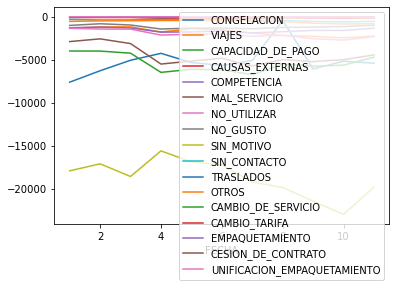

In [33]:
data[seleccionVariables+['FECHA']].groupby('FECHA').sum().plot()

In [29]:
data[seleccionVariables].sum().sum()

-456867

In [14]:
data.groupby('FECHA')['BAJAS_TOTAL'].sum().to_frame()

,BAJAS_TOTAL
FECHA,
1,-38364
2,-35597
3,-36876
4,-39942
5,-41021
6,-41380
7,-45407
8,-39259
9,-47691


In [24]:
data1=data.groupby('FECHA')['BAJAS_TOTAL'].sum().to_frame()

In [25]:
data1

,BAJAS_TOTAL
FECHA,
1,-38364
2,-35597
3,-36876
4,-39942
5,-41021
6,-41380
7,-45407
8,-39259
9,-47691


In [26]:
data1['BAJAS_TOTAL']=data1['BAJAS_TOTAL']*-1

<AxesSubplot:xlabel='FECHA'>

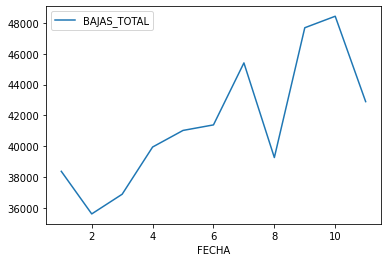

In [27]:
data1['BAJAS_TOTAL'].to_frame().plot()

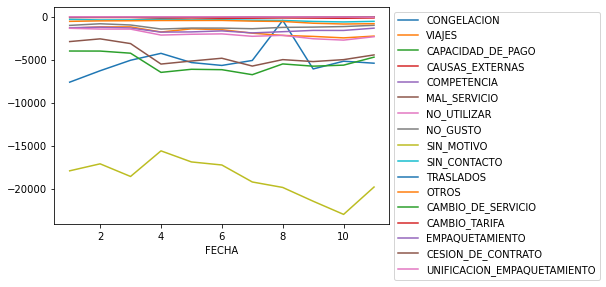

In [28]:
data.groupby('FECHA')[seleccionVariables].sum().plot()
plt.legend(bbox_to_anchor=(1.0, 1.0))

### Corrrelaciones

### Pearson

In [85]:
# para ver el grado de correlación entre las variables disponibles.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='pearson')

,variable_1,variable_2,r,abs_r
2619,ANTIGUEDAD_MESES_PROM,ANTIGUEDAD_MESES_MED,1.000000,1.000000
2683,ANTIGUEDAD_MESES_MED,ANTIGUEDAD_MESES_PROM,1.000000,1.000000
1034,INVOLUNTARIO,VOLUNTARIO,-1.000000,1.000000
1101,VOLUNTARIO,INVOLUNTARIO,-1.000000,1.000000
2281,PROM_VEL_HOGAR,PROM_VEL,0.993246,0.993246
1833,PROM_VEL,PROM_VEL_HOGAR,0.993246,0.993246
3075,PRECIO_MEGA_ETB_1,AVG_ETB_MEGAS,-0.986750,0.986750
3011,AVG_ETB_MEGAS,PRECIO_MEGA_ETB_1,-0.986750,0.986750
3203,AVG_MOVISTAR_MEGAS,AVG_ETB_MEGAS,0.972205,0.972205
3013,AVG_ETB_MEGAS,AVG_MOVISTAR_MEGAS,0.972205,0.972205


In [95]:
corr_tab=tidy_corr_matrix(corr_matrix)

In [101]:
corr_tab=corr_tab[corr_tab['variable_2']=='BAJAS_TOTAL'].drop(columns=['variable_2'])

In [102]:
corr_tab['abs_r'].describe()

count    67.000000
mean      0.068908
std       0.107448
min       0.000372
25%       0.014873
50%       0.030414
75%       0.062866
max       0.648231
Name: abs_r, dtype: float64

In [104]:
corr_tab[corr_tab['abs_r']>=0.06].sort_values('r')

,variable_1,r,abs_r
1287,CANTIDAD_ADMIN,-0.248793,0.248793
1219,CANTIDAD_LLAMADAS,-0.181563,0.181563
2579,CANTIDAD_churn,-0.109958,0.109958
2384,MEDIANA_VEL,-0.081629,0.081629
1083,INVOLUNTARIO,-0.080269,0.080269
1419,CAMPANA_HBO,-0.068197,0.068197
1151,VOLUNTARIO,0.080269,0.080269
702,SIN_CONTACTO,0.094646,0.094646
770,OTROS,0.117573,0.117573
566,NO_GUSTO,0.158246,0.158246


In [113]:
corr_tab_graf=corr_tab[corr_tab['abs_r']>=0.06].set_index('variable_1')

In [165]:
corr_tab_graf.drop(columns=['abs_r'],inplace=True)
corr_tab_graf.columns=['BAJAS_TOTAL']

KeyError: "['abs_r'] not found in axis"

In [167]:
corr_tab_graf.sort_values('BAJAS_TOTAL')

,BAJAS_TOTAL
variable_1,
CANTIDAD_ADMIN,-0.248793
CANTIDAD_LLAMADAS,-0.181563
CANTIDAD_churn,-0.109958
MEDIANA_VEL,-0.081629
INVOLUNTARIO,-0.080269
CAMPANA_HBO,-0.068197
VOLUNTARIO,0.080269
SIN_CONTACTO,0.094646
OTROS,0.117573


In [115]:
corr_matrix.columns

Index(['CUENTA', 'CONGELACION', 'VIAJES', 'CAPACIDAD_DE_PAGO',
       'CAUSAS_EXTERNAS', 'COMPETENCIA', 'MAL_SERVICIO', 'NO_UTILIZAR',
       'NO_GUSTO', 'SIN_MOTIVO', 'SIN_CONTACTO', 'TRASLADOS', 'OTROS',
       'CD_BLANCOS_CAMBIOS_OTROS', 'CAMBIO_DE_SERVICIO', 'CAMBIO_TARIFA',
       'EMPAQUETAMIENTO', 'CESION_DE_CONTRATO', 'UNIFICACION_EMPAQUETAMIENTO',
       'CD_BLANCOS_CAMBIOS_SERVICIO', 'FECHA', 'CHURN_TEMPRANO',
       'INVOLUNTARIO', 'VOLUNTARIO', 'CANTIDAD_LLAMADAS', 'CANTIDAD_ADMIN',
       'CANTIDAD_TECNICO', 'CAMPANA_HBO', 'CAMPANA_FOX', 'CAMPANA_ADULTO',
       'CAMPANA_EQUIPOS_ADIC', 'CAMPANA_ULTRAWIFI', 'CAMPANA_VOZ',
       'CAMPANA_RETENCION', 'CAMPANA_AFECTACION_SRV', 'PART_CANT_CALL',
       'CANT_USER', 'PROM_VEL', 'VEL_ME_8', 'VEL_10_25', 'VEL_30', 'VEL_40_50',
       'VEL_MA_60', 'CONVERGENTE', 'PROM_VEL_HOGAR', 'MEDIANA_VEL',
       'PROM_RENTA', 'PRECIO_MEGA_CLARO_1', 'CANTIDAD_churn',
       'ANTIGUEDAD_MESES_PROM', 'ANTIGUEDAD_MESES_MED', 'AVG_TARIFA_TIGO',
 

In [214]:
corr_matrix
variables_y=['CONGELACION','VIAJES','CAPACIDAD_DE_PAGO','CAUSAS_EXTERNAS','COMPETENCIA','MAL_SERVICIO','NO_UTILIZAR',
                    'NO_GUSTO','SIN_MOTIVO','SIN_CONTACTO','TRASLADOS','OTROS','CAMBIO_DE_SERVICIO','CAMBIO_TARIFA','EMPAQUETAMIENTO',
                    'CESION_DE_CONTRATO','UNIFICACION_EMPAQUETAMIENTO']
variables_x=list(set(corr_matrix.columns) - set(variables_y))

In [215]:
variables_x.remove('CUENTA')
variables_x.remove('CD_BLANCOS_CAMBIOS_SERVICIO')
variables_x.remove('FECHA')
variables_x.remove('BAJAS_TOTAL')
#variables_x.remove('CD_BLANCOS_CAMBIOS_SERVICIO')

In [216]:
variables_y.remove('CAMBIO_DE_SERVICIO')
variables_y.remove('TRASLADOS')
variables_y.remove('EMPAQUETAMIENTO')
variables_y.remove('CESION_DE_CONTRATO')
#variables_y.remove('CD_BLANCOS_CAMBIOS_SERVICIO')


In [217]:
corr_matrix_V2=corr_matrix.copy()[variables_y]

In [218]:
corr_matrix_V2=corr_matrix_V2[corr_matrix_V2.index.isin(variables_x)]

In [220]:
def _color_red_or_green(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

In [227]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

In [219]:
corr_matrix_V2

,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,OTROS,CAMBIO_TARIFA,UNIFICACION_EMPAQUETAMIENTO
CD_BLANCOS_CAMBIOS_OTROS,-0.000423,-0.000251,-0.000439,0.003235,-0.000235,-0.000401,-0.000269,-0.000203,-0.000837,0.028966,-0.000139,0.007460,-0.000026
CHURN_TEMPRANO,-0.003245,0.015487,0.022160,0.007249,0.015962,0.020613,0.015039,0.009106,0.033587,0.012245,0.006693,0.002792,0.002688
INVOLUNTARIO,0.062085,-0.022759,-0.048930,0.051158,-0.026900,-0.043717,-0.014471,-0.016426,-0.094658,0.087639,-0.005862,0.019701,0.016519
VOLUNTARIO,-0.062085,0.022759,0.048930,-0.051158,0.026900,0.043717,0.014471,0.016426,0.094658,-0.087639,0.005862,-0.019701,-0.016519
CANTIDAD_LLAMADAS,-0.015242,-0.026354,-0.068625,-0.011448,-0.029739,-0.108396,-0.035593,-0.044649,-0.112885,-0.020876,-0.018653,-0.011273,-0.001725
CANTIDAD_ADMIN,-0.032052,-0.039272,-0.100302,-0.016404,-0.041942,-0.113602,-0.052431,-0.060359,-0.161860,-0.026938,-0.019398,-0.010358,-0.001157
CANTIDAD_TECNICO,0.012182,-0.001319,-0.005467,-0.000882,-0.004478,-0.065645,-0.002087,-0.009640,-0.013130,-0.005374,-0.011168,-0.007930,-0.001755
CAMPANA_HBO,0.000562,0.000539,0.001232,NaN,0.000660,-0.100182,0.000638,0.000565,-0.046621,0.000170,0.000736,NaN,NaN
CAMPANA_FOX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAMPANA_ADULTO,0.000398,0.000381,0.000871,NaN,0.000467,0.000776,0.000451,0.000400,0.001712,0.000120,0.000520,NaN,NaN


In [231]:
corr_tab_V2=tidy_corr_matrix(corr_matrix_V2)

In [233]:
corr_tab_V2['abs_r'].describe()

count    581.000000
mean       0.010636
std        0.017587
min        0.000012
25%        0.001031
50%        0.004402
75%        0.013032
max        0.161860
Name: abs_r, dtype: float64

In [236]:
corr_tab_V2[corr_tab_V2['abs_r']>=0.05].sort_values('r')

,variable_1,variable_2,r,abs_r
73,CANTIDAD_ADMIN,SIN_MOTIVO,-0.161860,0.161860
70,CANTIDAD_ADMIN,MAL_SERVICIO,-0.113602,0.113602
60,CANTIDAD_LLAMADAS,SIN_MOTIVO,-0.112885,0.112885
57,CANTIDAD_LLAMADAS,MAL_SERVICIO,-0.108396,0.108396
67,CANTIDAD_ADMIN,CAPACIDAD_DE_PAGO,-0.100302,0.100302
95,CAMPANA_HBO,MAL_SERVICIO,-0.100182,0.100182
34,INVOLUNTARIO,SIN_MOTIVO,-0.094658,0.094658
291,CANTIDAD_churn,SIN_MOTIVO,-0.088095,0.088095
48,VOLUNTARIO,SIN_CONTACTO,-0.087639,0.087639
54,CANTIDAD_LLAMADAS,CAPACIDAD_DE_PAGO,-0.068625,0.068625


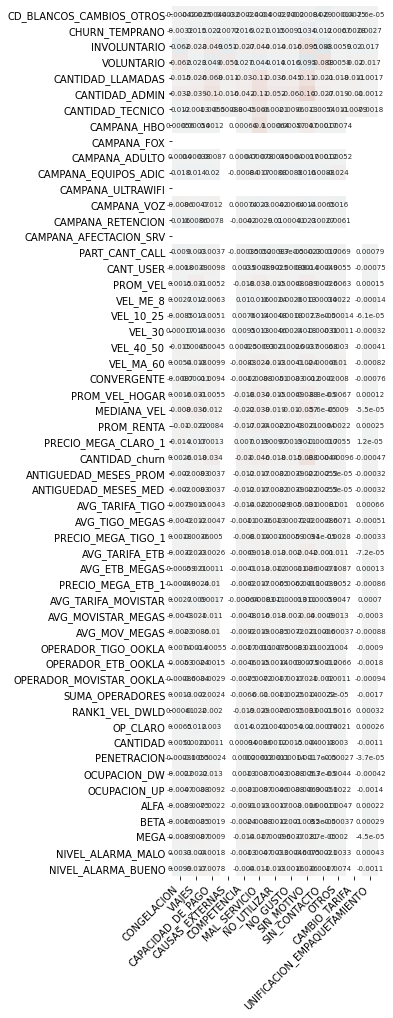

In [230]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(100, 16))

sns.heatmap(
    corr_matrix_V2,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 7},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [117]:
corr_matrix_spe = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')

In [120]:
corr_tab_spe=tidy_corr_matrix(corr_matrix_spe)
corr_tab_spe=corr_tab_spe[corr_tab_spe['variable_2']=='BAJAS_TOTAL'].drop(columns=['variable_2'])
corr_tab_spe['abs_r'].describe()

count    67.000000
mean      0.072234
std       0.109396
min       0.000585
25%       0.019643
50%       0.034594
75%       0.059928
max       0.649653
Name: abs_r, dtype: float64

In [122]:
corr_tab_spe[corr_tab_spe['abs_r']>=0.059].sort_values('r')

,variable_1,r,abs_r
1287,CANTIDAD_ADMIN,-0.316166,0.316166
1219,CANTIDAD_LLAMADAS,-0.237273,0.237273
2579,CANTIDAD_churn,-0.101448,0.101448
1083,INVOLUNTARIO,-0.080572,0.080572
1419,CAMPANA_HBO,-0.070883,0.070883
2384,MEDIANA_VEL,-0.064554,0.064554
1151,VOLUNTARIO,0.080572,0.080572
702,SIN_CONTACTO,0.094661,0.094661
770,OTROS,0.109664,0.109664
566,NO_GUSTO,0.157694,0.157694


In [238]:
corr_matrix_spe_V2=corr_matrix_spe.copy()[variables_y]
corr_matrix_spe_V2=corr_matrix_spe_V2[corr_matrix_spe_V2.index.isin(variables_x)]

In [239]:
corr_matrix_spe_V2

,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,OTROS,CAMBIO_TARIFA,UNIFICACION_EMPAQUETAMIENTO
CD_BLANCOS_CAMBIOS_OTROS,-0.000438,-0.000258,-0.000452,0.003567,-0.000242,-0.000413,-0.000277,-0.000209,-0.000862,0.012648,-0.000145,0.009118,-0.000027
CHURN_TEMPRANO,-0.002953,0.015566,0.022295,0.007283,0.016010,0.020714,0.015129,0.009198,0.033824,0.012277,0.006774,0.002897,0.002717
INVOLUNTARIO,0.064678,-0.022888,-0.049117,0.051398,-0.026978,-0.043849,-0.014529,-0.016474,-0.095055,0.087873,-0.005686,0.020446,0.016638
VOLUNTARIO,-0.064678,0.022888,0.049117,-0.051398,0.026978,0.043849,0.014529,0.016474,0.095055,-0.087873,0.005686,-0.020446,-0.016638
CANTIDAD_LLAMADAS,-0.022401,-0.046095,-0.094268,-0.014547,-0.045520,-0.108119,-0.054058,-0.049135,-0.155849,-0.025152,-0.015310,-0.006138,-0.001812
CANTIDAD_ADMIN,-0.044905,-0.063162,-0.125125,-0.019776,-0.061153,-0.124089,-0.073052,-0.061930,-0.210627,-0.032852,-0.016283,-0.006549,-0.001589
CANTIDAD_TECNICO,0.017820,-0.002965,-0.006994,-0.000592,-0.005020,-0.057515,-0.002287,-0.009557,-0.010847,-0.004384,-0.010093,-0.004386,-0.001397
CAMPANA_HBO,0.000590,0.000539,0.001232,NaN,0.000660,-0.106980,0.000638,0.000565,-0.048027,0.000170,0.000763,NaN,NaN
CAMPANA_FOX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAMPANA_ADULTO,0.000417,0.000381,0.000871,NaN,0.000467,0.000792,0.000451,0.000400,0.001728,0.000120,0.000539,NaN,NaN


In [242]:
corr_tab_spe_V2=tidy_corr_matrix(corr_matrix_spe_V2)

In [243]:
corr_tab_spe_V2['abs_r'].describe()

count    581.000000
mean       0.011680
std        0.019705
min        0.000010
25%        0.001239
50%        0.005020
75%        0.015408
max        0.210627
Name: abs_r, dtype: float64

In [245]:
corr_tab_spe_V2[corr_tab_spe_V2['abs_r']>=0.16].sort_values('r')

,variable_1,variable_2,r,abs_r
73,CANTIDAD_ADMIN,SIN_MOTIVO,-0.210627,0.210627


## Validar Nodos Críticos

In [132]:
NC_Velocidad=pd.read_csv('nodos_criticos_velocidad_promedio.csv')
NC_Tarifas=pd.read_csv('nodos_criticos_tarifas.csv')
NC_Velocidad_menor=pd.read_csv('nodos_criticos_velocidad_menor_a_promedio.csv')
NC_Volumen=pd.read_csv('nodosCriticos_volumen.csv')

In [133]:
NC_Volumen['NC_Vol']=NC_Volumen['COD_NODO']

In [134]:
NC_Velocidad_menor['NC_Vel_men']=NC_Velocidad_menor['COD_NODO']

In [135]:
NC_Velocidad['NC_Vel']=NC_Velocidad['COD_NODO']

In [136]:
NC_Tarifas=NC_Tarifas[NC_Tarifas['ET']==1][['COD_NODO']]
NC_Tarifas['NC_Tar']=NC_Tarifas['COD_NODO']

In [137]:
NC_com=NC_Velocidad.merge(NC_Tarifas, left_on='COD_NODO',right_on='COD_NODO',how='outer')
NC_com=NC_com.merge(NC_Velocidad_menor, left_on='COD_NODO',right_on='COD_NODO',how='outer')
NC_com=NC_com.merge(NC_Volumen, left_on='COD_NODO',right_on='COD_NODO',how='outer')

In [138]:
NC_com

,COD_NODO,NC_Vel,NC_Tar,NC_Vel_men,NC_Vol
0,HBP1,HBP1,NaN,NaN,NaN
1,8UT,8UT,NaN,NaN,NaN
2,OVL,OVL,NaN,NaN,NaN
3,GEH,GEH,GEH,NaN,NaN
4,URB,URB,NaN,NaN,NaN
...,...,...,...,...,...
6943,ZS1,NaN,NaN,NaN,ZS1
6944,ZS4,NaN,NaN,NaN,ZS4
6945,ZT3,NaN,NaN,NaN,ZT3
6946,ZVD,NaN,NaN,NaN,ZVD


In [139]:
NC_com.notnull().sum()

COD_NODO      6948
NC_Vel        1291
NC_Tar        1144
NC_Vel_men    2828
NC_Vol        3233
dtype: int64

In [140]:
#NC_com.isnull().sum()

In [141]:
NC_com.notnull().sum()/len(NC_com)

COD_NODO      1.000000
NC_Vel        0.185809
NC_Tar        0.164652
NC_Vel_men    0.407024
NC_Vol        0.465314
dtype: float64

In [142]:
NC_com.drop(columns='COD_NODO').notnull().sum(axis=1).to_frame().value_counts()

1    5462
2    1424
3      62
dtype: int64

In [143]:
NC_com[['NC_Vel','NC_Vel_men']].dropna(how='all').notnull().sum(axis=1).to_frame().value_counts()

1    3981
2      69
dtype: int64

In [144]:
NC_com[['NC_Vel','NC_Tar']].dropna(how='all').notnull().sum(axis=1).to_frame().value_counts()

1    2179
2     128
dtype: int64

In [150]:
NC_com[['NC_Vel_men','NC_Tar']].dropna(how='all').notnull().sum(axis=1).to_frame().value_counts()

1    3660
2     156
dtype: int64

In [160]:
NC_comun=pd.DataFrame(index=NC_com.columns, columns=NC_com.columns)

In [161]:
for col in NC_com.columns:
    for fil in NC_com.columns:
        if col != fil:
            val=NC_com[[col,fil]].dropna(how='all').notnull().sum(axis=1).to_frame().value_counts()[2]
            NC_comun.at[col,fil]=val        

In [162]:
NC_comun=NC_comun[NC_comun.index!='COD_NODO']

In [163]:
NC_comun

,COD_NODO,NC_Vel,NC_Tar,NC_Vel_men,NC_Vol
NC_Vel,1291,NaN,128,69,101
NC_Tar,1144,128,NaN,156,171
NC_Vel_men,2828,69,156,NaN,985
NC_Vol,3233,101,171,985,NaN
